In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier    
from sklearn.svm import SVC
import plotly.express as px

songs=pd.read_csv('top50.csv')
songs.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [2]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [3]:
songs.isnull().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

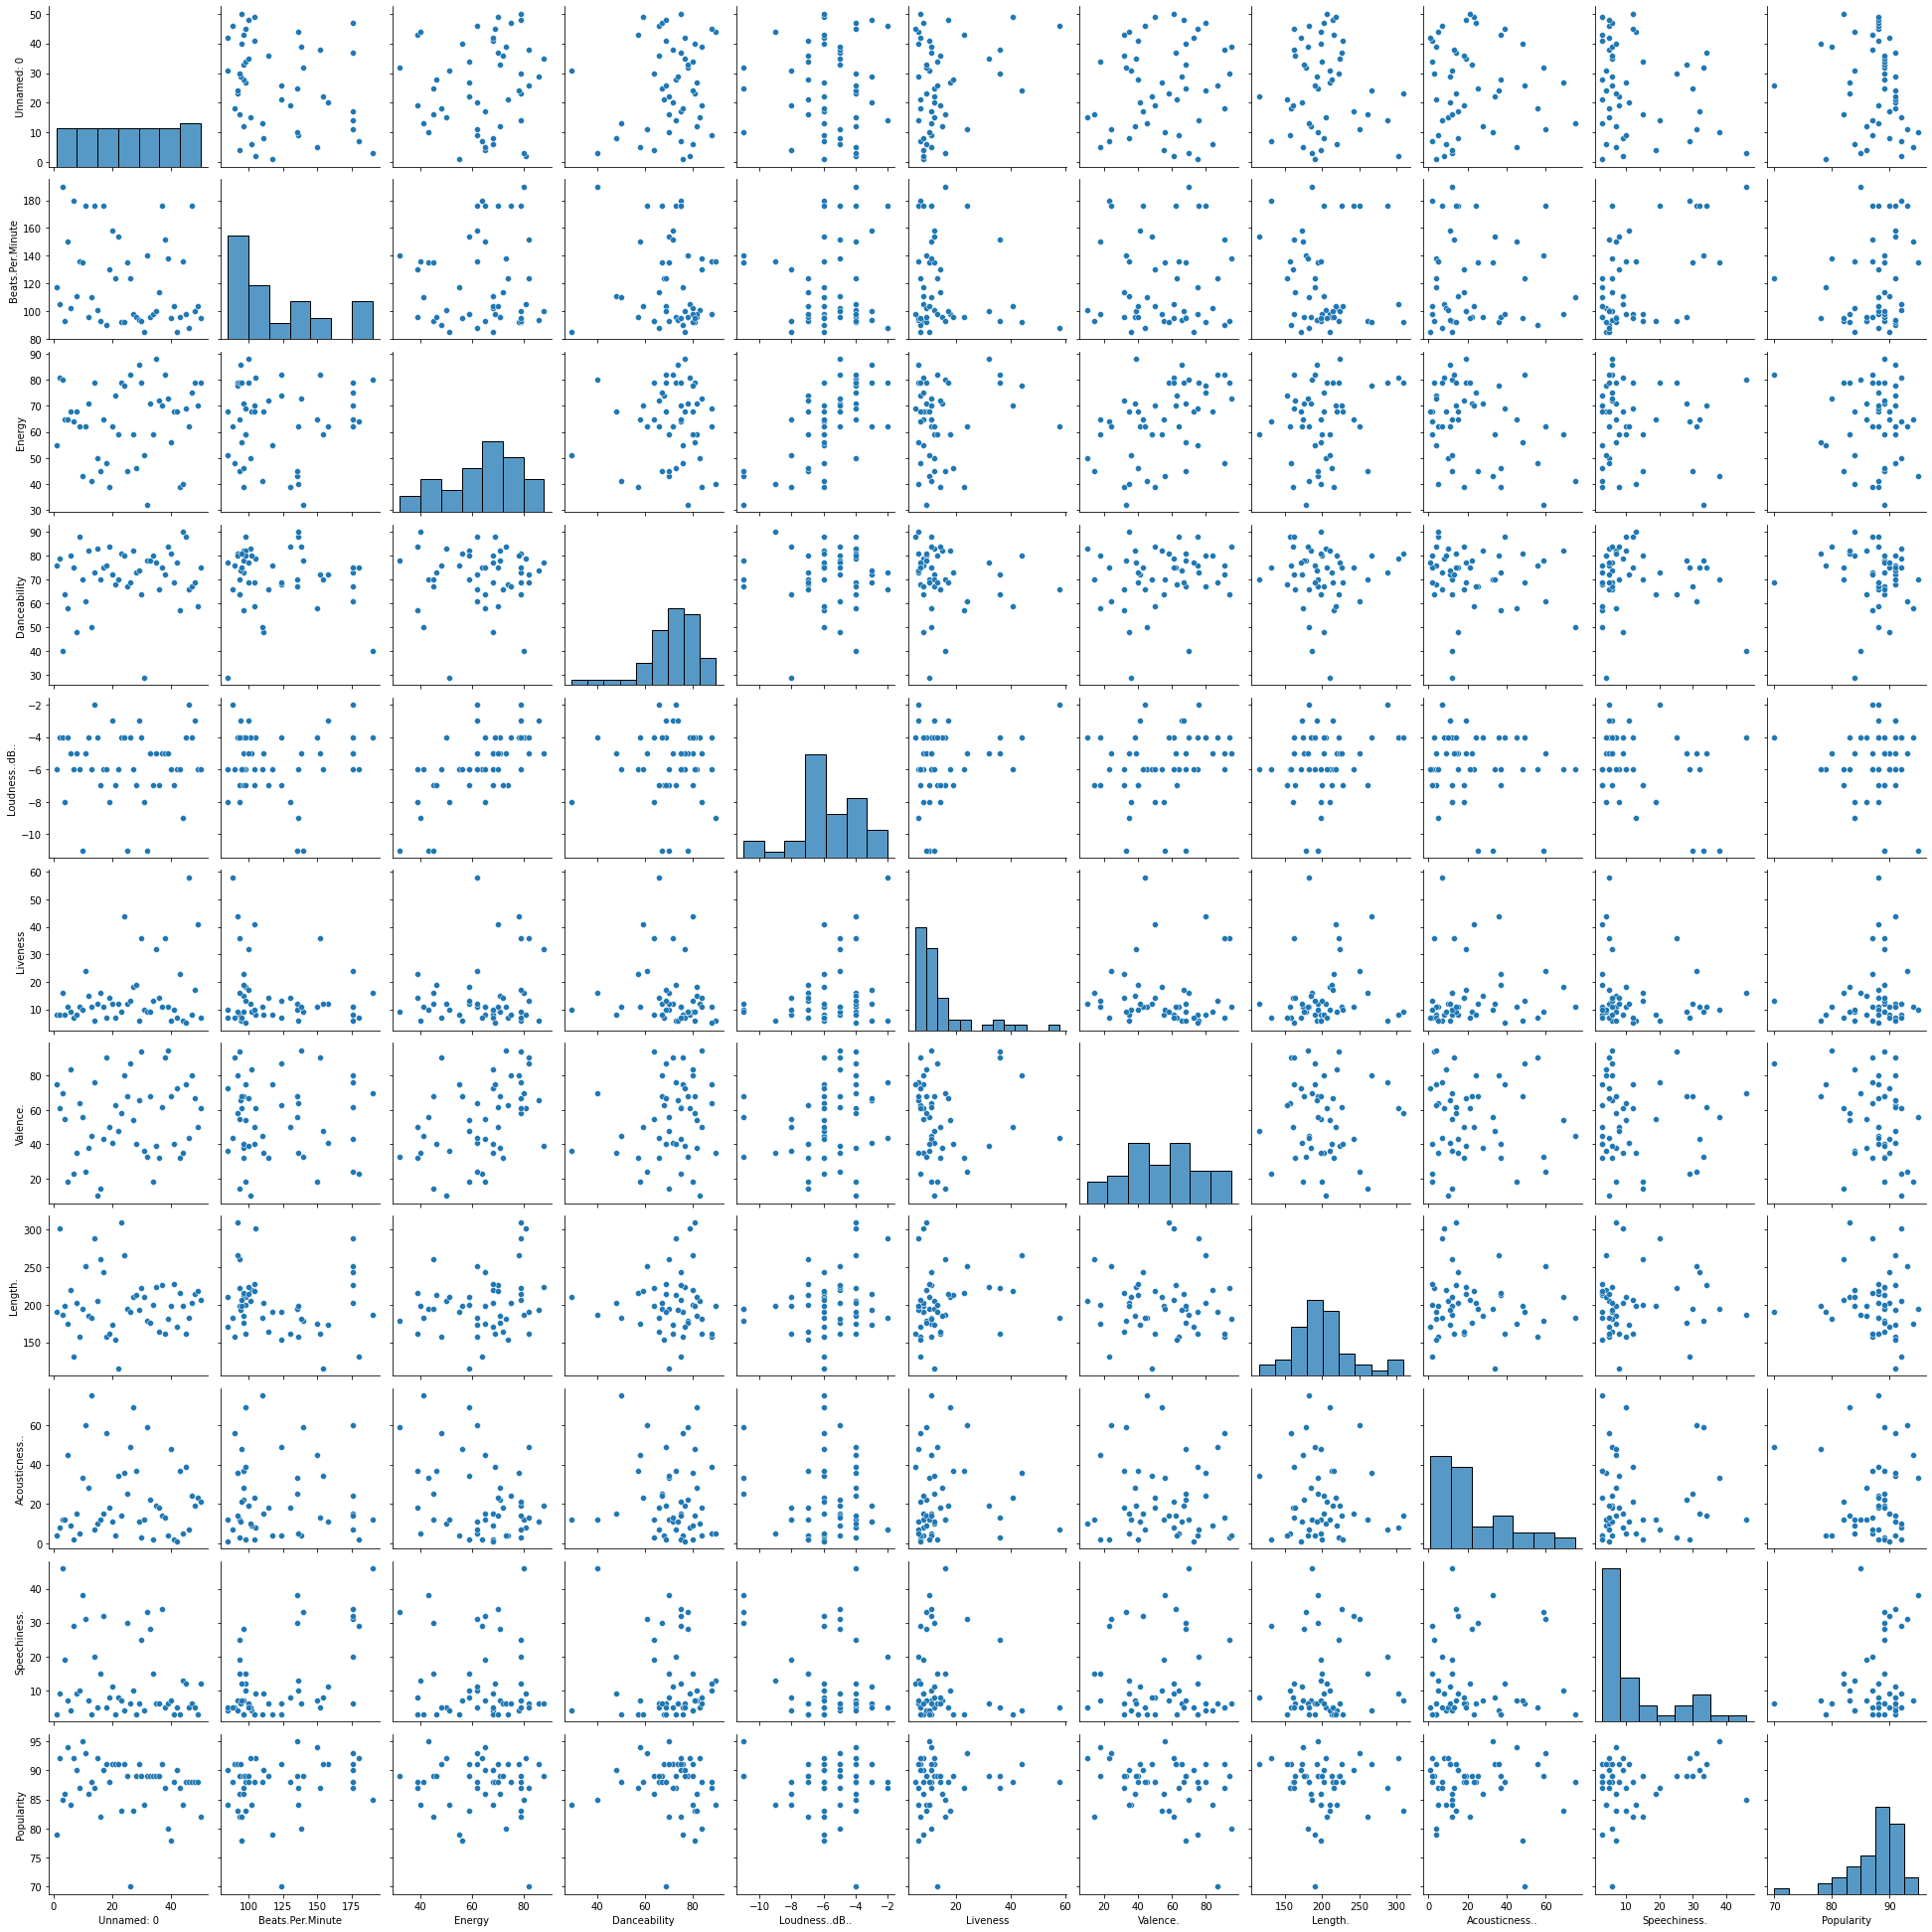

In [4]:
sns.pairplot(songs)

<AxesSubplot:>

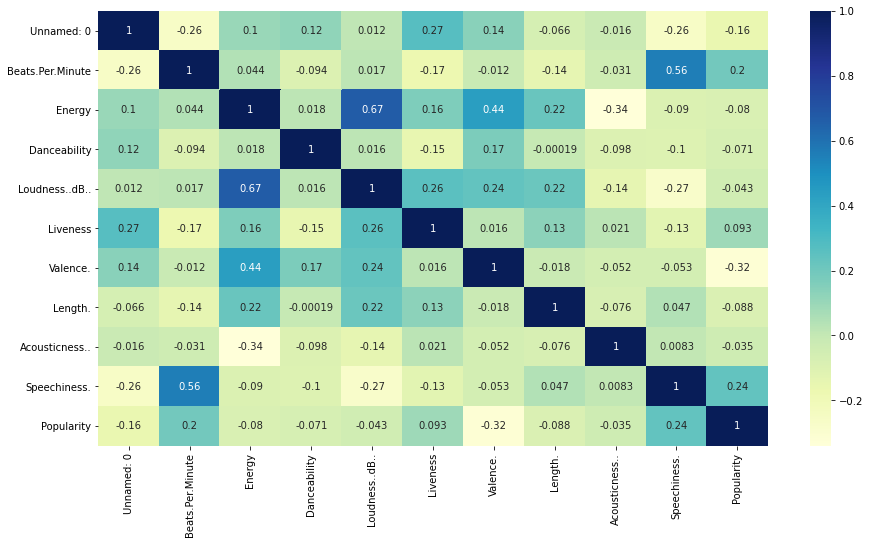

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(songs.corr(), annot= True, cmap= "YlGnBu")

In [6]:
songs=songs.drop(['Unnamed: 0','Track.Name'],axis=1)


In [7]:
songs

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


Gets the popularity mean and whats' above the mean will be more popular and below values will be less popular

In [8]:
songs['Popularity']=pd.qcut(songs['Popularity'],q=2,labels=[0,1])

array([[<AxesSubplot:title={'center':'Beats.Per.Minute'}>,
        <AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Danceability'}>],
       [<AxesSubplot:title={'center':'Loudness..dB..'}>,
        <AxesSubplot:title={'center':'Liveness'}>,
        <AxesSubplot:title={'center':'Valence.'}>],
       [<AxesSubplot:title={'center':'Length.'}>,
        <AxesSubplot:title={'center':'Acousticness..'}>,
        <AxesSubplot:title={'center':'Speechiness.'}>]], dtype=object)

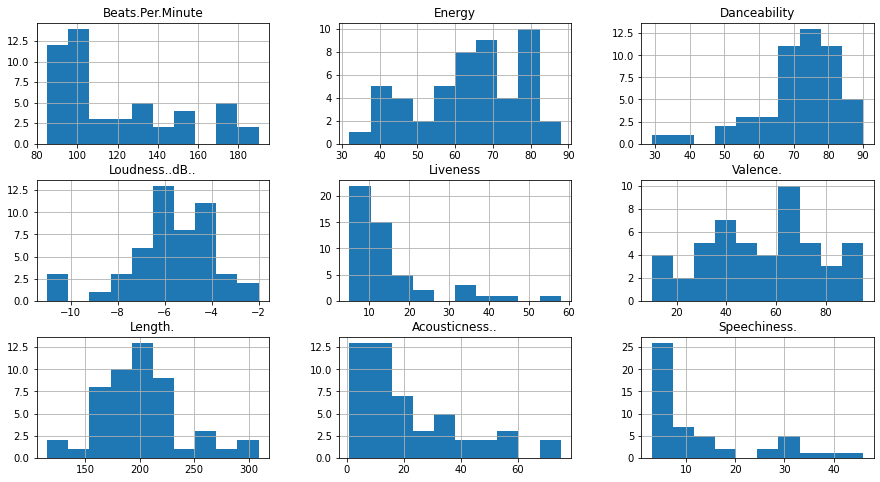

In [9]:
songs.hist(figsize=(15,8))

One-hot encoding (turn string or int to binary)

In [10]:
enc=OneHotEncoder(handle_unknown='ignore', sparse=False)
# songs_encoded=enc.fit(songs)
categ_columns=['Artist.Name','Genre']
songs_categorical = songs[categ_columns]
songs_numerical = songs.drop(categ_columns, axis=1)
songs_encoded=enc.fit_transform(songs_categorical)
songs_encoded_df = pd.DataFrame(songs_encoded ,columns=enc.get_feature_names(categ_columns),  index=songs.index)
songs_encoded_df=pd.concat([songs_encoded_df, songs_numerical], axis=1)
songs_encoded_df

 
 

,Artist.Name_Ali Gatie,Artist.Name_Anuel AA,Artist.Name_Ariana Grande,Artist.Name_Bad Bunny,Artist.Name_Billie Eilish,Artist.Name_Chris Brown,Artist.Name_DJ Snake,Artist.Name_Daddy Yankee,Artist.Name_Drake,Artist.Name_Ed Sheeran,...,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,117,55,76,-6,8,75,191,4,3,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,105,81,79,-4,8,61,302,8,9,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,190,80,40,-4,16,70,186,12,46,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,93,65,64,-8,8,55,198,12,19,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150,65,58,-4,11,18,175,45,7,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,102,68,80,-5,9,84,220,9,4,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180,64,75,-6,7,23,131,2,29,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111,68,48,-5,8,35,202,15,9,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,136,62,88,-6,11,64,157,5,10,0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,135,43,70,-11,10,56,194,33,38,1


Splitting and scaling

x independant features
y dependant features

In [11]:
y=songs_encoded_df.loc[:,'Popularity']
x=songs_encoded_df.drop('Popularity',axis=1)


In [12]:
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=1234)


Modeling and training

In [14]:
model1=LogisticRegression()
model2=KNeighborsClassifier()
model3=DecisionTreeClassifier()
model4=MLPClassifier()
model5=SVC()


In [15]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)

SVC()

In [16]:
model1_acc=model1.score(X_test,y_test)
model2_acc=model2.score(X_test,y_test)
model3_acc=model3.score(X_test,y_test)
model4_acc=model4.score(X_test,y_test)
model5_acc=model5.score(X_test,y_test)

d:\Programs\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
print("Logistic Regression Accuracy:", model1_acc)
print("K-Nearest-Neighbors Accuracy:", model2_acc)
print("Decision Tree Accuracy:", model3_acc)
print("Neural Network Accuracy:", model4_acc)
print("Support Vector Machine Accuracy:", model5_acc)

Logistic Regression Accuracy: 0.5428571428571428
K-Nearest-Neighbors Accuracy: 0.4
Decision Tree Accuracy: 0.6
Neural Network Accuracy: 0.6
Support Vector Machine Accuracy: 0.5428571428571428


In [19]:
fig=px.bar(
     x=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine"],
    y=[model1_acc, model2_acc, model3_acc, model4_acc, model5_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)
fig.show()